In [1]:
# %autosave 0

### 모표준편차 산출 실습

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline

In [2]:
np.random.seed(1)
np.random.randint(1, 10, size=10) # 10은 출력 안됨

array([6, 9, 6, 1, 1, 2, 8, 7, 3, 5])

In [3]:
np.random.seed(1)
data = np.random.randint(1, 10, size=(5, 3))
data

array([[6, 9, 6],
       [1, 1, 2],
       [8, 7, 3],
       [5, 6, 3],
       [5, 3, 5]])

In [4]:
df = pd.DataFrame(data, columns = ['python', 'crawling', 'analysis'])
df

,python,crawling,analysis
0,6,9,6
1,1,1,2
2,8,7,3
3,5,6,3
4,5,3,5


In [5]:
df.index >= 1

array([False,  True,  True,  True,  True])

In [6]:
df.index <= 3

array([ True,  True,  True,  True, False])

In [7]:
# index filtering
# df2 = df[df.index >= 1 & df.index <= 3] # X
df2 = df[(df.index >= 1) & (df.index <= 3)] # X
df2

,python,crawling,analysis
1,1,1,2
2,8,7,3
3,5,6,3


In [8]:
df.columns

Index(['python', 'crawling', 'analysis'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [10]:
# .loc[행 인덱스, 컬럼명]
df.loc[0, 'python'] = -1000
df.loc[4, 'python'] = 2000
df.loc[0, 'crawling'] = np.nan # int 32 -> float64 자동 변경
df=round(df, 0)
df

,python,crawling,analysis
0,-1000,NaN,6
1,1,1.0,2
2,8,7.0,3
3,5,6.0,3
4,2000,3.0,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   python    5 non-null      int32  
 1   crawling  4 non-null      float64
 2   analysis  5 non-null      int32  
dtypes: float64(1), int32(2)
memory usage: 208.0 bytes


In [12]:
df2 = round(df.describe(), 1)
df2
# count: 데이터 갯수
# mean: 컬럼별 평균
# std: 표준 편차, 평균 0, 분산(표준편차) = 1
# min: 최소값
# 25%: 25% 위치의 값
# 50%: 50% 위치의 값, 중위수
# 75%: 75% 위치의 값
# max: 최대값

,python,crawling,analysis
count,5.0,4.0,5.0
mean,202.8,4.2,3.8
std,1094.8,2.8,1.6
min,-1000.0,1.0,2.0
25%,1.0,2.5,3.0
50%,5.0,4.5,3.0
75%,8.0,6.2,5.0
max,2000.0,7.0,6.0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   python    8 non-null      float64
 1   crawling  8 non-null      float64
 2   analysis  8 non-null      float64
dtypes: float64(3)
memory usage: 256.0+ bytes


In [14]:
tot = sum(df['python'])         # python 변수의 합
print('total:', tot)
mean = tot / len(df['python'])  # python 변수의 평균
print('mean:', mean)
deviation = mean - df['python'] # 편차: 평균과의 차이
print('deviation(편차):','\n', deviation)
print('deviation(편차)의 합: {0:.3f}'.format(sum(deviation))) # 편차의 합은 0
print('deviation(편차)의 합: {0:.15f}'.format(sum(deviation)))

total: 1014
mean: 202.8
deviation(편차): 
 0    1202.8
1     201.8
2     194.8
3     197.8
4   -1797.2
Name: python, dtype: float64
deviation(편차)의 합: -0.000
deviation(편차)의 합: -0.000000000000227


In [15]:
# 편차의 합이 0이면 편차는 없는가?
deviation = (mean - df['python']) ** 2 # 편차의 제곱
deviation

0    1446727.84
1      40723.24
2      37947.04
3      39124.84
4    3229927.84
Name: python, dtype: float64

In [16]:
cnt = len(df['python'])
cnt

5

In [17]:
deviation_sum = sum(deviation) # 편차의 제곱의 합, ∑ (ㄷ + 한자)
print('평균 제곱 오차의 합:', deviation_sum)
variance = deviation_sum / cnt # 분산
print('모분산 σ²:', variance)
standard_deviation = np.sqrt(variance)
print('모표준 편차 σ:', standard_deviation) # 표준편차 = √분산, √σ²

평균 제곱 오차의 합: 4794450.800000001
모분산 σ²: 958890.1600000001
모표준 편차 σ: 979.2293704745586


In [18]:
deviation_sum = sum(deviation) # 편차의 제곱의 합
print('평균 제곱 오차의 합:', deviation_sum)
variance = deviation_sum / (cnt-1) # 분산
print('표본 분산 S²:', variance)
standard_deviation = np.sqrt(variance)
print('표본 표준 편차 S:', standard_deviation) # 표준편차 = √분산, √S²

평균 제곱 오차의 합: 4794450.800000001
표본 분산 S²: 1198612.7000000002
표본 표준 편차 S: 1094.811718972719


In [178]:
np.random.seed(5)
data = np.random.randint(0, 101, size=(5))
data
df = pd.DataFrame(data, columns=['python'])
df

,python
0,99
1,78
2,61
3,16
4,73


In [164]:
# 합계, 평균, 편차, 편차의 제곱의 합, 모분산, 모표준편차를 산출하시오.
tot = sum(df['python']) # 합계
print('합계:', tot)
mean = tot / len(df['python']) # 평균
print('평균:', mean)

합계: 327
평균: 65.4


In [168]:
deviation = mean - df['python'] # 편차
print('편차:')
print(deviation)

deviation = (mean - df['python']) ** 2 # 편차의 제곱
deviation_sum = sum(deviation) # 편차의 제곱의 합
print('편차의 제곱의 합:', deviation_sum)

편차:
0   -33.6
1   -12.6
2     4.4
3    49.4
4    -7.6
Name: python, dtype: float64
편차의 제곱의 합: 3805.2


In [179]:
variance = deviation_sum / len(df['python'])
print('모분산 σ²:', variance) # 분산
standard_deviation = np.sqrt(variance)
print('모표준 편차 σ:', standard_deviation) # 표준 편차

모분산 σ²: 761.04
모표준 편차 σ: 27.58695343817436


In [ ]:
### 데이터가 동일한 경우

In [35]:
# data = np.array([3, 3 , 2, 3, 3])
# data = np.array([3, 3 , 2, 3, 3])
# 편차의 제곱의 합: 0.7999999999999999
# 모분산 σ²: 0.15999999999999998
# 모표준 편차 σ: 0.39999999999999997

# data = np.array([3, 3 , 4, 3, 3])
# 편차의 제곱의 합: 0.7999999999999999
# 모분산 σ²: 0.15999999999999998
# 모표준 편차 σ: 0.39999999999999997

data = np.array([3, 3 , 4, 5, 6])
# 편차의 제곱의 합: 6.8
# 모분산 σ²: 1.3599999999999999
# 모표준 편차 σ: 1.16619037896906

df = pd.DataFrame(data, columns=['python'])
df

,python
0,3
1,3
2,4
3,5
4,6


In [36]:
# 합계, 평균, 편차, 편차의 제곱의 합, 모분산, 모표준편차를 산출하시오.
tot = sum(df['python']) # 합계
print('합계:', tot)
mean = tot / len(df['python']) # 평균
print('평균:', mean)

합계: 21
평균: 4.2


In [37]:
deviation = mean - df['python'] # 편차
print('편차:')
print(deviation)

편차:
0    1.2
1    1.2
2    0.2
3   -0.8
4   -1.8
Name: python, dtype: float64


편차의 제곱의 합: 6.8
모분산 σ²: 1.3599999999999999
모표준 편차 σ: 1.16619037896906


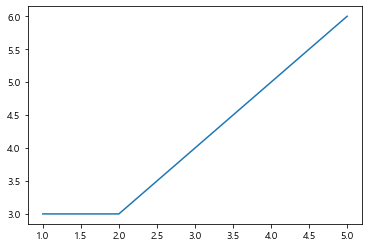

In [41]:
deviation = (mean - df['python']) ** 2 # 편차의 제곱
deviation_sum = sum(deviation) # 편차의 제곱의 합
print('편차의 제곱의 합:', deviation_sum)
variance = deviation_sum / cnt # 분산
print('모분산 σ²:', variance)
standard_deviation = np.sqrt(variance)
print('모표준 편차 σ:', standard_deviation) # 표준편차 = √분산, √σ²
plt.plot(np.array([1,2,3,4,5]), data)